### **`Exploring different pretrained models in Hugging face`**

Objective: The primary goal of this assignment is to familiarize students with the Python programming environment and the use of pretrained models on Hugging Face. This foundational knowledge will be crucial for training and fine-tuning our own models in future assignments.

1.Setup and Requirements Installation


In [ ]:
!pip install transformers
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.3 MB/s eta 0:00:00


2. Sentiment Analysis with a Pretrained Model:

We will start with a sentiment analysis task using a pretrained model from Hugging Face. Access the model via this link:
https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest


Exercise 1:

Use the following Python code to perform sentiment analysis. Your task is to modify the text variable with different prompts and observe how the model's sentiment predictions change. Pay attention to preprocessing the text for optimal model performance.

In [ ]:
# Set up dependencies and load the model
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Example running case

In [ ]:
# Customize your input query
text = "I'm so happy!"

# Preprocess sentence before passing to the model
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
# Pass the input to the model and get the raw output
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

# Print labels and scores
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) positive 0.9845
2) neutral 0.0098
3) negative 0.0057


# Integrate the sampling code into a single function

In [ ]:
def clasifySentence(text):
    # Preprocess sentence before passing to the model
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt')
    # Pass the input to the model and get the raw output
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    # Print labels and scores
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    for i in range(scores.shape[0]):
        l = config.id2label[ranking[i]]
        s = scores[ranking[i]]
        print(f"{i+1}) {l} {np.round(float(s), 4)}")

In [ ]:
clasifySentence('Today is a good day')

1) positive 0.9775
2) neutral 0.0169
3) negative 0.0056


In [ ]:
clasifySentence('I am learning AI today.')

1) neutral 0.5799
2) positive 0.412
3) negative 0.0081


In [ ]:
clasifySentence('I feel headache.')

1) negative 0.6244
2) neutral 0.3139
3) positive 0.0617


Exercise 2:

 * Select another sentiment analysis model from Hugging Face and compare its performance with the model used in Exercise 1. Document your findings.

 * Encapsulate the prediction task into a single function, like the example we provided in Exercise 1.

List of text classification pretrained models:

https://huggingface.co/models?pipeline_tag=text-classification&sort=trending


In [ ]:
!pip install emoji==0.6.0

In [4]:
# TODO, write your code here
# Load model directly
# Load model directly
# Load model directly
#Set up dependencies and load the model
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)
from transformers import AutoTokenizer, AutoModelForSequenceClassification
MODEL = f"sbcBI/sentiment_analysis_model"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

label_0 : negative

label_1 : neutral

label_2 : positive

In [5]:
# Customize your input query
text = "I'm so happy!"

# Preprocess sentence before passing to the model
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
# Pass the input to the model and get the raw output
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

# Print labels and scores
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) LABEL_2 0.9361
2) LABEL_1 0.0359
3) LABEL_0 0.028


In [6]:
def clasifySentence(text):
    # Preprocess sentence before passing to the model
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt')
    # Pass the input to the model and get the raw output
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    # Print labels and scores
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    for i in range(scores.shape[0]):
        l = config.id2label[ranking[i]]
        s = scores[ranking[i]]
        print(f"{i+1}) {l} {np.round(float(s), 4)}")

In [7]:
clasifySentence('Today is a good day')

1) LABEL_2 0.9467
2) LABEL_1 0.0305
3) LABEL_0 0.0229


In [8]:
clasifySentence('I am learning AI today.')

1) LABEL_0 0.4312
2) LABEL_1 0.4255
3) LABEL_2 0.1432


In [9]:
clasifySentence('I feel headache.')

1) LABEL_0 0.9565
2) LABEL_1 0.0291
3) LABEL_2 0.0144


**COMPARING RESULTS FROM Excercise 1 and Exercise 2**

label_0 : negative
label_1 : neutral
label_2 : positive

Text: "I'm so happy!" : Both models strongly agree that the sentiment is positive, with roberta showing slightly higher confidence in the positive sentiment.

Text: "Today is a good day.": Both models are in agreement about the positive sentiment of the text, with roberta showing a bit more confidence in positivity.

Text: "I am learning AI today." : This example shows a significant difference in interpretation. roberta leans towards a neutral sentiment with a slightly positive component, whereas sbcBI, BERT-based model interprets the sentiment as primarily negative, followed by neutral.


Text: "I feel headache." : both models agree on the sentiment being negative. However, sbcBI, BERT-based model shows a much higher confidence in the negative classification than roberta.

**ANALYSIS**

**Agreement on Clearly Positive Texts:**Both models show strong agreement on texts with clearly positive sentiments.

**Disagreement on Ambiguous Texts:** The models show a notable disagreement on the text "I am learning AI today." roberta interprets it as mostly neutral with a positive undertone, whereas sbcBI, BERT-based model surprisingly leans towards a negative sentiment. This discrepancy could be due to differences in the training data, model architecture, or how each model weighs specific words and contexts.

In summary, both models generally agree on the sentiment of clearly positive and negative texts, their interpretations can significantly differ for more neutral or ambiguous statements. This highlights the importance of understanding the context, training data, and underlying biases of sentiment analysis models when interpreting their predictions.






Exercise 3:
 * Utilize the ResNet 50 pretrained model for image classification. You can access the model through this link:
 https://huggingface.co/microsoft/resnet-50
 * Your task is to encapsulate the prediction task into a single function, like the example we provided in Exercise 1.
 * Pick and upload your own images.
 * Classify and visualize 3 custom images using this model.




In [27]:
pip install transformers torch


In [36]:
import json
from transformers import AutoModelForImageClassification, AutoFeatureExtractor
import torch
from PIL import Image

def classify_image_with_resnet50(image_path, class_index_path='imagenet_class_index.json'):
    # Load the class index to label mapping
    with open(class_index_path) as json_file:
        class_idx_to_label = json.load(json_file)

    # Initialize the model and feature extractor
    model = AutoModelForImageClassification.from_pretrained("microsoft/resnet-50")
    feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-50")

    # Open and preprocess the image
    image = Image.open(image_path)
    inputs = feature_extractor(images=image, return_tensors="pt")

    # Make prediction
    with torch.no_grad():
        logits = model(**inputs).logits

    # Retrieve the highest probability class label
    predicted_class_idx = logits.argmax(-1).item()
    predicted_class = class_idx_to_label[str(predicted_class_idx)][1]  # Mapping index to class label

    return predicted_class



In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


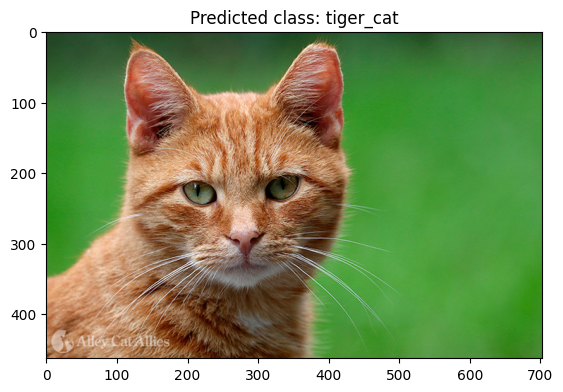

In [40]:
def display_image_with_prediction(image_path, predicted_class):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'Predicted class: {predicted_class}')
    plt.show()

image_path = '/content/FELV-cat.jpg'
predicted_class = classify_image_with_resnet50(image_path)
display_image_with_prediction(image_path, predicted_class)


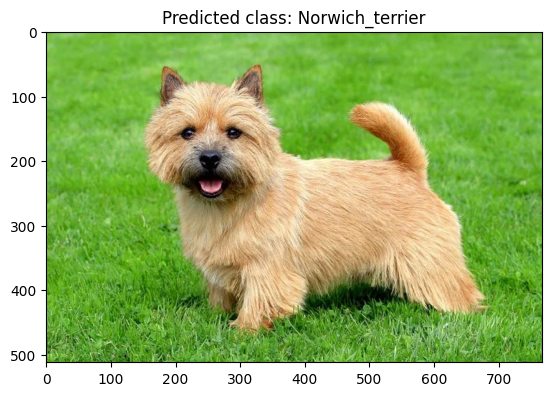

In [41]:
image_path = '/content/GettyImages-187066830.webp'
predicted_class = classify_image_with_resnet50(image_path)
display_image_with_prediction(image_path, predicted_class)

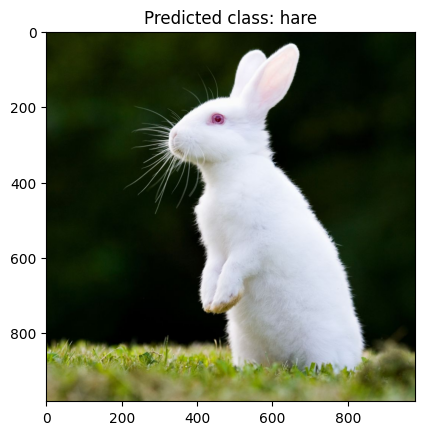

In [42]:
image_path = '/content/rabbit-breeds-american-white-1553635287.jpg'
predicted_class = classify_image_with_resnet50(image_path)
display_image_with_prediction(image_path, predicted_class)

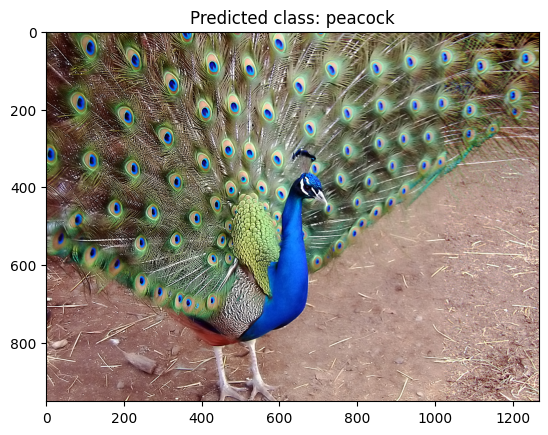

In [43]:
image_path = '/content/peacock-1395751.jpg'
predicted_class = classify_image_with_resnet50(image_path)
display_image_with_prediction(image_path, predicted_class)